<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.435119,31.085693,43.451791,62.804115,-0.000611,223.776108,223.776604,-0.000496
1,0.0,1.0,40.126397,43.897863,84.474352,98.315147,-0.000353,276.813406,276.813486,-0.000080
2,0.0,2.0,83.424767,92.967787,86.097025,49.388520,0.000096,321.878195,321.878359,-0.000164
3,0.0,3.0,61.944919,28.418312,44.764483,74.554969,-0.000677,219.682006,219.682365,-0.000359
4,0.0,4.0,69.511188,56.676174,40.598734,57.034899,0.000308,233.821303,233.820657,0.000646
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,83.820467,36.866627,47.262626,88.717472,0.000051,266.667243,266.667418,-0.000175
19996,999.0,16.0,99.786776,31.836872,84.344138,31.454842,-0.000175,257.422453,257.422069,0.000384
19997,999.0,17.0,89.216583,57.165844,74.454920,70.157113,-0.000259,300.994201,300.994159,0.000041
19998,999.0,18.0,94.441740,58.041299,86.858624,84.620302,0.000025,333.961989,333.961571,0.000418


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.435119  31.085693  43.451791  62.804115 -0.000611  223.776108   
      1.0    40.126397  43.897863  84.474352  98.315147 -0.000353  276.813406   
      2.0    83.424767  92.967787  86.097025  49.388520  0.000096  321.878195   
      3.0    61.944919  28.418312  44.764483  74.554969 -0.000677  219.682006   
      4.0    69.511188  56.676174  40.598734  57.034899  0.000308  233.821303   
...                ...        ...        ...        ...       ...         ...   
999.0 15.0   83.820467  36.866627  47.262626  88.717472  0.000051  266.667243   
      16.0   99.786776  31.836872  84.344138  31.454842 -0.000175  257.422453   
      17.0   89.216583  57.165844  74.454920  70.157113 -0.000259  300.994201   
      18.0   94.441740  58.041299  86.858624  84.620302  0.000025  333.961989   
      19.0   38.106990  21.983013  36.453146  91.075991  0.000982  197.620122   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    223.776604 -0.000496  
      1.0    276.813486 -0.000080  
      2.0    321.878359 -0.000164  
      3.0    219.682365 -0.000359  
      4.0    233.820657  0.000646  
...                 ...       ...  
999.0 15.0   266.667418 -0.000175  
      16.0   257.422069  0.000384  
      17.0   300.994159  0.000041  
      18.0   333.961571  0.000418  
      19.0   197.619822  0.000299  

[20000 rows x 8 columns]

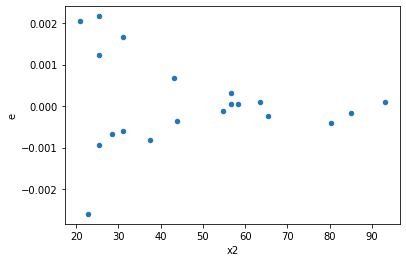

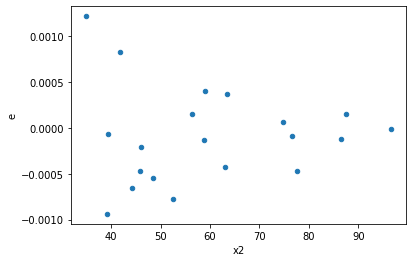

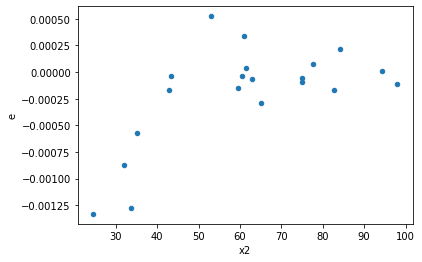

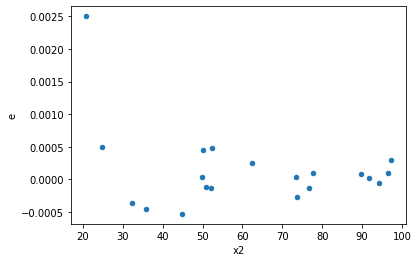

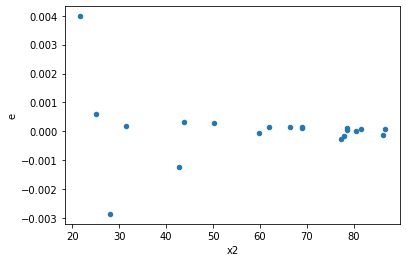

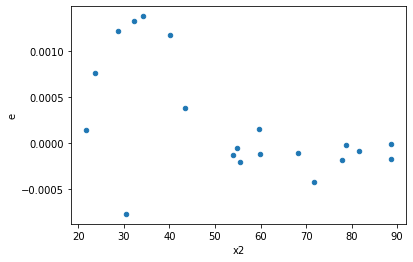

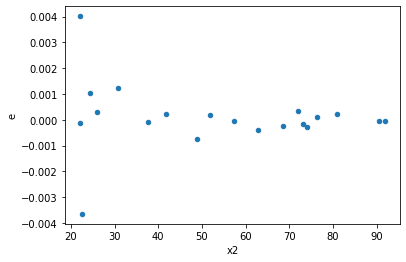

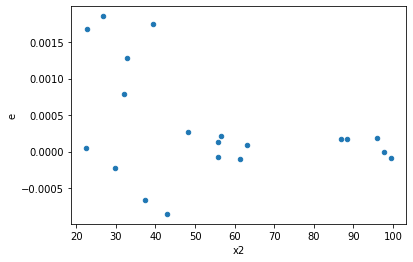

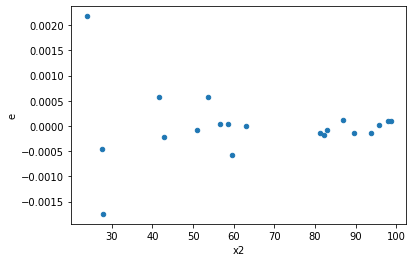

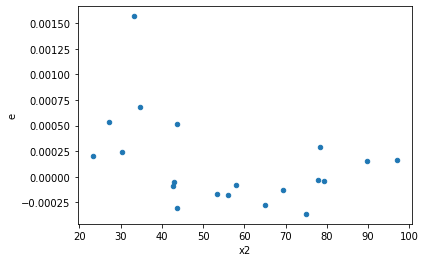

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]


    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
41.0,4.0,4.0,1.340680054158229e-07,1.479708892695197e-07,3.3517001353955724e-08,3.6992722317379927e-08,1.103700236388062,0.926118578915917,0.5369407105420415,0.4630592894579585,Reject001=1 : Homoscedasticity
66.0,4.0,4.0,6.170115889012303e-08,7.814536185718108e-08,1.5425289722530758e-08,1.953634046429527e-08,1.2665136808263482,0.8244316784001526,0.5877841607999237,0.4122158392000763,Reject001=1 : Homoscedasticity
97.0,4.0,4.0,7.083320446240813e-08,7.203463623803517e-08,1.7708301115602033e-08,1.8008659059508793e-08,1.0169614206323907,0.9873862083079863,0.5063068958460069,0.49369310415399315,Reject001=1 : Homoscedasticity
98.0,4.0,4.0,1.3999894263181965e-07,1.7853936989728638e-07,3.499973565795491e-08,4.4634842474321594e-08,1.275290845351764,0.8193983483639653,0.5903008258180173,0.40969917418198265,Reject001=1 : Homoscedasticity
140.0,4.0,4.0,1.469355035483524e-07,1.8529859876523762e-07,3.67338758870881e-08,4.6324649691309404e-08,1.2610879895631282,0.8275646949411328,0.5862176525294336,0.4137823474705664,Reject001=1 : Homoscedasticity
239.0,4.0,4.0,4.546528992634955e-08,1.1930006584217578e-07,1.1366322481587387e-08,2.9825016460543946e-08,2.6239811961043946,0.37281292519994924,0.8135935374000254,0.18640646259997462,Reject001=1 : Homoscedasticity
260.0,4.0,4.0,6.301866123107262e-08,1.1126739985393743e-07,1.5754665307768154e-08,2.781684996348436e-08,1.7656262078616614,0.5953534457912308,0.7023232771043846,0.2976767228956154,Reject001=1 : Homoscedasticity
314.0,4.0,4.0,1.3600807376111923e-07,1.3673965871559217e-07,3.4002018440279806e-08,3.418491467889804e-08,1.005378981807785,0.9959765942322947,0.5020117028838527,0.49798829711614734,Reject001=1 : Homoscedasticity
342.0,4.0,4.0,7.256801744175326e-07,9.173313348799511e-07,1.8142004360438314e-07,2.2933283371998778e-07,1.26409865836041,0.8258241634220826,0.5870879182889587,0.4129120817110413,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,6.111969343271024e-07,3.676865270860384e-08,1.527992335817756e-07,9.19216317715096e-09,0.06015843772037945,0.01858894250291357,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,6.594446895169843e-07,4.902510946164851e-07,1.6486117237924608e-07,1.2256277365412128e-07,0.7434301957539056,0.7808478838166819,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,8.026157414235509e-07,1.0538165847588734e-07,2.0065393535588772e-07,2.6345414618971836e-08,0.1312977718191501,0.07456555957333472,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,3.921846612451742e-06,3.578629570607261e-08,9.804616531129354e-07,8.946573926518152e-09,0.009124858578724682,0.0004876270339088853,Reject001=0 : Heteroscedasticity
4.0,4.0,4.0,5.945983048089118e-06,9.421635567176041e-08,1.4864957620222795e-06,2.3554088917940102e-08,0.015845379125666876,0.0014446462306728827,Reject001=0 : Heteroscedasticity
5.0,4.0,4.0,2.8426657509420687e-06,6.313077241812052e-08,7.106664377355172e-07,1.578269310453013e-08,0.02220829951505863,0.002791044708066129,Reject001=0 : Heteroscedasticity
6.0,4.0,4.0,1.8163305385922254e-06,1.9260690628086596e-07,4.5408263464805636e-07,4.815172657021649e-08,0.10604177058551736,0.0516269706459998,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,2.103756759782963e-06,1.0091227327533971e-07,5.259391899457407e-07,2.522806831883493e-08,0.04796765253686005,0.012186911214994002,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,4.017588027779455e-06,2.0073471895817504e-08,1.0043970069448638e-06,5.018367973954376e-09,0.004996398773846464,0.00014780687026434312,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    608
Reject001=1 : Homoscedasticity      392
Name: Result_test, dtype: int64